<a href="http://landlab.github.io"><img style="float: left" src="../../../landlab_header.png"></a>

# Quantifying river channel evolution with Landlab
These exercises are based on a project orginally designed by Kelin Whipple at Arizona State University. This notebook was created by Nicole Gasparini at Tulane University.

<hr>
<small>For tutorials on learning Landlab, click here: <a href="https://github.com/landlab/landlab/wiki/Tutorials">https://github.com/landlab/landlab/wiki/Tutorials</a></small>
<hr>

**What is this notebook?**

This notebook illustrates the evolution of detachment-limited channels in an actively uplifting landscape. The landscape evolves according to the equation:

\begin{equation}
 \frac{d z}{d t} = -K_\text{sp} A^{m_{sp}} S^{n_{sp}} + U
\end{equation}
Here, $K_{sp}$ is the erodibility coefficient on fluvial incision, which is thought to be positively correlated with climate wetness, or storminess (this is hard to quantify) and to be negatively correlated with rock strength (again, rock strength is hard to quantify). $m_{sp}$ and $n_{sp}$ are positive exponents, usually thought to have a ratio, $m_{sp}/n_{sp} \approx 0.5$. $A$ is drainage area and $S$ is the slope of steepest descent ($-\frac{dz}{dx}$) where $x$ is horizontal distance (positive in the downslope direction) and $z$ is elevation. (If slope is negative there is no fluvial erosion.) $U$ is an externally-applied rock uplift field.

The fluvial erosion term is also known as the stream power equation. Before using this notebook you should be familiar with this equation from class lectures and reading. 

For a great overview of the stream power equation, see: 

- Whipple and Tucker, 1999, Dynamics of the stream-power river incision model: Implications for height limits of mountain ranges, landscape response timescales, and research needs, Journal of Geophysical Research.

For some great illustrations of modeling with the sream power equation, see:

- Tucker and Whipple, 2002, Topographic outcomes predicted by stream erosion models: Sensitivity analysis and intermodel comparison, Journal of Geophysical Research.

Helpful background on landscape sensitivity to rock uplift rates and patterns can be found here:

- Kirby and Whipple, 2012, Expression of active tectonics in erosional landscapes, Journal of Structural Geology.

**What will you do?**

In this exercise you will modify the code to get a better understanding of how rock uplift rates and patterns and the erodibility coefficient control fluvial channel form.

Start at the top by reading each block of text and sequentially running each code block (shift - enter OR got to the _Cell_ pulldown menu at the top and choose _Run Cells_). 

If you just change one code block and rerun only that code block, only the parts of the code in that code block will be updated. (E.g. if you change parameters but don't reset the code blocks that initialize run time or topography, then these values will not be reset.) 

**STUDENTS: Questions to answer before starting this assignment.**

Answer these questions before running the notebook.

1. What do you think will happen to total relief (defined as the maximum minus the minimum elevation, here area is fixed) and channel slope at steady state if $K_{sp}$ is uniformly increased?
2. What do you think will happen to total relief and channel slope at steady state if $U$ is uniformly increased?
3. How do you think a steady-state landscape with a uniform low rock uplift rate will respond if rock uplift is uniformly increased (relative to a steady base level)? How will channel slopes change through time?

**Now on to the code...**

First we have to import the parts of Python and Landlab that are needed to run this code. You should not have to change this first code block.

In [1]:
# Code block 1

import copy
import sys
import os

import numpy as np
from matplotlib import pyplot as plt

from landlab import RasterModelGrid, imshow_grid
from landlab.components import (
    ChannelProfiler,
    ChiFinder,
    FlowAccumulator,
    SteepnessFinder,
    StreamPowerEroder,
)
from landlab.io import write_esri_ascii

Make a grid and set boundary conditions. 

Here we make the initial grid of elevation of zeros with a very small amount of noise to make a more pleasing network.

Set parameters related to time.

Set parameters for incision and intializing all of the process components that do the work. We also initialize tools for quantifying the landscape.

Initialize rock uplift rate. This will need to be changed later.

Now for the code loop. 

Note that you can rerun Code Block 7 many times, and as long as you don't reset the elevation field (Code Block 3), it will take the already evolved landscape and evolve it even more. If you want to change parameters in other code blocks (e.g. Code Block 5 or 6), you can do that too, and as long as you don't reset the elevation field (Code Block 3) the new parameters will apply on the already evolved topography. 

Plot the topography.

Plot the slope and area data at each point on the landscape (in log-log space). We will only plot the core nodes because the boundary nodes have slopes that are influenced by the boundary conditions. 

It is slightly easier to interpret slope-area data when we look at a single channel, rather than the entire landscape. Below we plot the profile and slope-area data for the three largest channels on the landscape.

The chi index is a useful way to quantitatively interpret fluvial channels. Below we plot the chi index in the three largest channels and also a chi map across the entire landscape. 

The channel steepness index is another useful index to quantify fluvial channels. Below we plot the steepness index in the same three largest channels, and also plot steepness index across the grid.

If you have a grid that you want to export, uncomment and edit the appropriate lines below and run the code block.

After running every code block once, has the landscape reached steady state? Answer: NO! How do you know? After you think about this, you are ready to complete this project.

Answer the following questions using the code above and below. All answers should be typed, and supporting figures (produced using the code) should be embedded in one document that you hand in. Code Blocks 8-12 and 18-21 produce different figures that you may find useful. You can use any or all of these different figures to help you with the questions below. (Download or screenshoot the figures.) 

Anything with a question mark should be answered in the document that you hand in. Make sure your write in full sentences and proofread the document that you hand in.

1. **Steady state with low uplift rate. ** Using the parameters provided in the initial notebook, run the landscape to steady state. (Note that you can keep running the main evolution loop - Code Block 7 - and the different plotting blocks without running the code blocks above them. You may also want to change $tmax$ in Code Block 4.) How did you know that the landscape reached steady state? Note the approximate time that it took to reach steady state for your own reference. (This will be usefull for later questions.) Include appropriate plots. (If you want to analyze these landscapes outside of Landlab or save for later, make sure you save the elevation data to a text file (Code Block 13).)

** NOTE, For the rest of the questions you should use Code Blocks 14 - 21. These will allow you to use the steady-state landscape created for question 1 - referred to here as the 'base landscape' - as the initial condition. Start by editing what you need to in Code Blocks 14 - 16. Run these each once, sequentially. You can run Code Block 17, the time loop, as many times as you need to, along with Code Blocks 18-21, which produce plots.**

2. **Transient landscape responding to an increase in rock uplift. ** Use the base landscape and increase rock uplift uniformly by a factor of 4 to 0.0004 m/yr. Make sure you update the rock uplift rate (Code Block 16) and ensure that $tmax$ is 1e5 yrs and $dt$ is 500 yrs (Code Block 15). Run this until the maximum elevation in the grid is ~ 170 m and observe how the landscape gets to this elevation, i.e. plot intermediate steps. What patterns do you see in the supporting plots that illustrate this type of transient? Which patterns, if any, are diagnostic of a landscape response to uniform increase in rock uplift rate? (You may need to answer this after completing all of the questions.)

3. ** Steady-state landscape with increased rock uplift. ** Now run the landscape from question 2 until it reaches steady state. (I.e. run the time loop, Code Block 17, a bunch of times. You can increase $tmax$ and $dt$ to make this run faster.) Provide a plot that illustrates that the landscape is in steady state. What aspects of the landscape have changed in comparison with the base landscape from question 1?

4. ** Increase erodibility. ** Start again from the base landscape, but this time increase $K_{sp}$ to 2E-5 (Code Block 14). Make sure rock uplift rate is set to the original value of 0.0001 m/yr (Code Block 16). Set $tmax$ to 1e5 yrs (Code Block 15). Run for 1e5 yrs and save the plots that you think are diagnostic. Run for another 1e5 yrs and save plots again. Now run for 5e5 yrs and save plots again. Quantitatively describe how the landscape evolves in response to the increase in erodibility and provide supporting plots. What could cause a uniform increase in erodibility?

5. ** Spatially varible uplift - discrete, massive earthquake. ** Start again from the base landscape, and make sure that $K_{sp}$ = 1E-5 (Code Block 14). Now add a seismic event to this steady state landscape - a fault that runs horizontally across the landscape at y = 4000 m, and instantaneously uplifts half the landscape by 10 meters (Code Block 16). In this case, we will keep background uplift uniform at 0.0001 m/yr. Set $tmax$ to 1e5 yrs and $dt$ to 500 yrs (Code Block 15) before evolving the landscape after the fault. Now run the time loop four times and look at the different plots after each loop. How does the landscape respond to this fault? What patterns do you see in the supporting plots that illustrate this type of transient? Which patterns, if any, are diagnostic of a channel response to an earthquake? (You may need to answer this after completing all of the questions.)

6. ** Spatially Varible Rock Uplift - discrete fault with two different uplift rates. ** Start again from the base landscape, and make sure that $K_{sp}$ = 1E-5 (Code Block 14). Now we will add a fault (at y = 4000 m) to this landscape. In this case the uplift rate on the footwall is higher (0.0004 m/yr) than on the hanging wall (uplift rate = 0.0001 m/yr). (Edit Code Block 16.) Set $tmax$ to 1e5 yrs and $dt$ to 500 yrs (Code Block 15). Now run the time loop four separate times and look at the different plots after each loop. How does the landscape respond to this fault? What patterns do you see in the supporting plots that illustrate this type of transient? Which patterns, if any, are diagnostic of a channel response to a this type of gradient in rock uplift rates? (You may need to answer this after completing all of the questions.)

7. ** Spatially Varible Rock Uplift - gradient in uplift across the range. ** Start again from the base landscape, and make sure that $K_{sp}$ = 1E-5 (Code Block 14). Now we will add a linear gradient in uplift rate across the entire range (edit Code Block 16). The maximum uplift rate will be 0.0004 m/yr at the core of the range, and 0.0001 m/yr at the front of the range. Set $tmax$ to 1e5 yrs (Code Block 4) and $dt$ to 500 yrs before you start running the time loop for the fault before you start running the time loop with the rock uplift gradient. Now run the time loop four separate times and look at the different plots after each loop. How does the landscape respond to this gradient in uplift rate? What patterns do you see in the supporting plots that illustrate this type of transient? Which patterns, if any, are diagnostic of a channel response to this type of gradient in rock uplift rates? (You may need to answer this after completing all of the questions.)

8. ** Final Reflection. ** Was your initial insight into how parameters would affect the landscape correct? Discuss in 6 sentences or less.

In [2]:
# Wrapper class
def RunWrapper(**kwargs):
    # Code Block 2
    number_of_rows = 50  # number of raster cells in vertical direction (y)
    number_of_columns = 100  # number of raster cells in horizontal direction (x)
    dxy = 200  # side length of a raster model cell, or resolution [m]

    # Below is a raster (square cells) grid, with equal width and height
    mg1 = RasterModelGrid((number_of_rows, number_of_columns), dxy)

    # Set boundary conditions - only the south side of the grid is open.
    # Boolean parameters are sent to function in order of
    # east, north, west, south.
    mg1.set_closed_boundaries_at_grid_edges(True, True, True, False)
    
    # Code Block 3
    np.random.seed(35)  # seed set so our figures are reproducible
    mg1_noise = (np.random.rand(mg1.number_of_nodes) / 1000.0
                 )  # intial noise on elevation gri

    # set up the elevation on the grid
    z1 = mg1.add_zeros("topographic__elevation", at="node")
    z1 += mg1_noise
    
    # Code Block 4, setup time

    dt = 1000  # time step [yr] (Original value was 100 yr)
    nstep = 500 # total steps to run
    total_time = 0  # amount of time the landscape has evolved [yr]
                    # total_time will increase as you keep running the code.
    
    # Code Block 5, setup K, m, n
    # Original K_sp value is 1e-5
    K_sp = 1.0e-5  # units vary depending on m_sp and n_sp
    m_sp = 0.5  # exponent on drainage area in stream power equation
    n_sp = 1.0  # exponent on slope in stream power equation

    frr = FlowAccumulator(mg1, flow_director='FlowDirectorD8')  # intializing flow routing
    spr = StreamPowerEroder(mg1, K_sp=K_sp, m_sp=m_sp, n_sp=n_sp,
                            threshold_sp=0.0)  # initializing stream power incision

    theta = m_sp / n_sp
    # initialize the component that will calculate channel steepness
    sf = SteepnessFinder(mg1, reference_concavity=theta, min_drainage_area=1000.0)
    # initialize the component that will calculate the chi index
    cf = ChiFinder(mg1,
                   min_drainage_area=1000.0,
                   reference_concavity=theta,
                   use_true_dx=True)
    
    # Code Block 6
    # Setup uplift_rate [m/yr] (Original value is 0.0001 m/yr)
    uplift_rate_value = 0.0001
    uplift_rate = np.ones(mg1.number_of_nodes) * uplift_rate_value
    
    # Code Block 7, solve topography
    is_run_to_converge = kwargs.get('is_run_to_converge', False)
    if is_run_to_converge:
        max_elev_this = np.max(z1)
        # tolerance for relative error
        tolerance = kwargs.get('tolerance', 1e-2)
        # todo
        while True:
            for step in range(nstep):
                z1[mg1.
                   core_nodes] += uplift_rate[mg1.core_nodes] * dt  # uplift the landscape
                frr.run_one_step()  # route flow
                spr.run_one_step(dt)  # fluvial incision
                total_time += dt  # update time keeper
                sys.stdout.write("\r{0}".format(total_time))
                sys.stdout.flush()
            # condition to converge
            max_elev_prev = max_elev_this
            max_elev_this = np.max(z1)
            max_elev_diff = abs(max_elev_this - max_elev_prev) / abs(max_elev_this)
            sys.stdout.write(" max_elev_diff=%.4e\n" % (max_elev_diff))
            sys.stdout.flush()
            is_converge = (max_elev_diff) < tolerance
            if is_converge:
                break
            
    else:
        for step in range(nstep):
            z1[mg1.
               core_nodes] += uplift_rate[mg1.core_nodes] * dt  # uplift the landscape
            frr.run_one_step()  # route flow
            spr.run_one_step(dt)  # fluvial incision
            total_time += dt  # update time keeper
            sys.stdout.write("\r{0}".format(total_time))
            sys.stdout.flush()

    # fix output
    sys.stdout.write("\n")
    sys.stdout.flush()
    
    option = kwargs.get("option", "test0")
    if option == "test0":
        # assertion in default condition
        assert(abs(np.max(z1) - 50.0000721461) / 50.0000721461 < 1e-10)
        sys.stdout.write("test0: assertion succeeds")
    
    elif option == "plot":
        
        # make a sub-directories
        _dir = './stream_power_channels_results'
        dirname = "Ksp%.4e_uplift%.4e" % (K_sp, uplift_rate_value)
        subdir = os.path.join(_dir, dirname)
        if os.path.isdir(subdir):
            pass
        else:
            os.mkdir(subdir)
        
        # plot the result
        # Code Block 8, plot the elevation
        # print the maximum elevation
        max_elev = np.max(z1)
        print("Maximum elevation is ", np.max(z1))
        plt.figure()
        imshow_grid(mg1,
                    "topographic__elevation",
                    grid_units=("m", "m"),
                    var_name="Elevation (m)")
        title_text = f"$K_{{sp}}$={K_sp}; $time$={total_time} yr; $dx$={dxy} m;\n" \
                     + " max_elev= %.3f m" % max_elev
        plt.title(title_text)
        # save the figure
        filename = "dxy%.4e_total_time%.4e_1_topography.png" % (dxy, total_time)
        filepath = os.path.join(subdir, filename)
        plt.savefig(filepath)


        # Code Block 9, plot the slope/area
        plt.figure()
        plt.loglog(
            mg1.at_node["drainage_area"][mg1.core_nodes],
            mg1.at_node["topographic__steepest_slope"][mg1.core_nodes],
            "b.",
        )
        plt.ylabel("Topographic slope")
        plt.xlabel("Drainage area (m^2)")
        title_text = f"$K_{{sp}}$={K_sp}; $time$={total_time} yr; $dx$={dxy} m"
        plt.title(title_text)
        # save the figure
        filename = "dxy%.4e_total_time%.4e_2_slope_area.png" % (dxy, total_time)
        filepath = os.path.join(subdir, filename)
        plt.savefig(filepath)
        
        # Code Block 10

        # profile the largest channels, set initially to find the mainstem channel in the three biggest watersheds
        # you can change the number of watersheds, or choose to plot all the channel segments in the watershed that
        # have drainage area below the threshold (here we have set the threshold to the area of a grid cell).
        prf = ChannelProfiler(mg1,
                              number_of_watersheds=3,
                              main_channel_only=True,
                              minimum_channel_threshold=dxy**2)
        prf.run_one_step()

        # plot the elevation as a function of distance upstream
        plt.figure()
        title_text = f"$K_{{sp}}$={K_sp}; $time$={total_time} yr; $dx$={dxy} m"
        prf.plot_profiles(xlabel='distance upstream (m)',
                          ylabel='elevation (m)',
                          title=title_text)
        # save the figure
        filename = "dxy%.4e_total_time%.4e_3_elevation_distance.png" % (dxy, total_time)
        filepath = os.path.join(subdir, filename)
        plt.savefig(filepath)
        
        # plot the location of the channels in map view
        plt.figure()
        prf.plot_profiles_in_map_view()
        # save the figure
        filename = "dxy%.4e_total_time%.4e_4_channels.png" % (dxy, total_time)
        filepath = os.path.join(subdir, filename)
        plt.savefig(filepath)
        
        # slope-area data in just the profiled channels
        plt.figure()
        for i, outlet_id in enumerate(prf.data_structure):
            for j, segment_id in enumerate(prf.data_structure[outlet_id]):
                if j == 0:
                    label = "channel {i}".format(i=i + 1)
                else:
                    label = '_nolegend_'
                segment = prf.data_structure[outlet_id][segment_id]
                profile_ids = segment["ids"]
                color = segment["color"]
                plt.loglog(
                    mg1.at_node["drainage_area"][profile_ids],
                    mg1.at_node["topographic__steepest_slope"][profile_ids],
                    '.',
                    color=color,
                    label=label,
                )
        plt.legend(loc="lower left")
        plt.xlabel("drainage area (m^2)")
        plt.ylabel("channel slope [m/m]")
        title_text = f"$K_{{sp}}$={K_sp}; $time$={total_time} yr; $dx$={dxy} m"
        plt.title(title_text)
        # save the figure
        filename = "dxy%.4e_total_time%.4e_5_channels_slope_area.png" % (dxy, total_time)
        filepath = os.path.join(subdir, filename)
        plt.savefig(filepath)
        
        # Code Block 12
        # calculate channel steepness
        sf.calculate_steepnesses()
        # plots of steepnes vs. distance upstream in the profiled channels
        plt.figure()
        for i, outlet_id in enumerate(prf.data_structure):
            for j, segment_id in enumerate(prf.data_structure[outlet_id]):
                if j == 0:
                    label = "channel {i}".format(i=i + 1)
                else:
                    label = '_nolegend_'
                segment = prf.data_structure[outlet_id][segment_id]
                profile_ids = segment["ids"]
                distance_upstream = segment["distances"]
                color = segment["color"]
                plt.plot(
                    distance_upstream,
                    mg1.at_node["channel__steepness_index"][profile_ids],
                    'x',
                    color=color,
                    label=label,
                )
        plt.xlabel("distance upstream (m)")
        plt.ylabel("steepness index")
        plt.legend(loc="upper left")
        plt.title(
            f"$K_{{sp}}$={K_sp}; $time$={total_time} yr; $dx$={dxy} m; concavity={theta}"
        )
        # save the figure
        filename = "dxy%.4e_total_time%.4e_6_steepnes_distance.png" % (dxy, total_time)
        filepath = os.path.join(subdir, filename)
        plt.savefig(filepath)

        # channel steepness map
        plt.figure()
        imshow_grid(
            mg1,
            "channel__steepness_index",
            grid_units=("m", "m"),
            var_name="Steepness index ",
            cmap="jet",
        )
        title_text = ("$K_{sp}$=" + str(K_sp) + "; $time$=" + str(total_time) +
                      "yr; $dx$=" + str(dxy) + "m" + "; concavity=" + str(theta))
        plt.title(
            f"$K_{{sp}}$={K_sp}; $time$={total_time} yr; $dx$={dxy} m; concavity={theta}"
        )
        # save the figure
        filename = "dxy%.4e_total_time%.4e_7_steepness_map.png" % (dxy, total_time)
        filepath = os.path.join(subdir, filename)
        plt.savefig(filepath)
    
    # return the topography
    return z1

500000 max_elev_diff=9.9998e-01
1000000 max_elev_diff=3.6975e-01
1500000 max_elev_diff=7.0520e-02
2000000 max_elev_diff=3.3360e-03
2500000 max_elev_diff=5.8601e-04
3000000 max_elev_diff=1.0263e-04
3500000 max_elev_diff=3.4433e-06
4000000 max_elev_diff=1.0183e-07

Maximum elevation is  73.91181079


/home/jovyan/.conda/envs/gel214_test/lib/python3.8/site-packages/landlab/plot/imshow.py:267: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("pink"))
  cmap.set_bad(color=color_for_closed)
/home/jovyan/.conda/envs/gel214_test/lib/python3.8/site-packages/landlab/plot/imshow.py:307: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(norm=norm, shrink=shrink)
/home/jovyan/.conda/envs/gel214_test/lib/python3.8/site-packages/landlab/plot/imshow.py:267: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered co

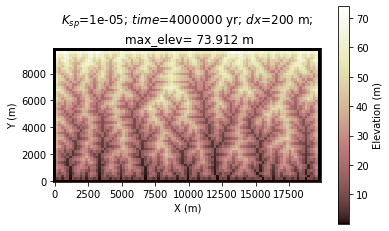

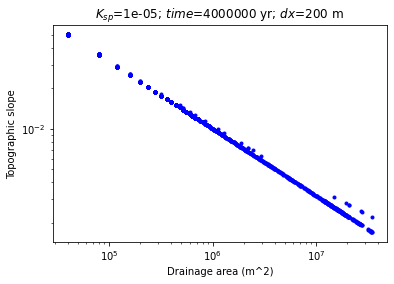

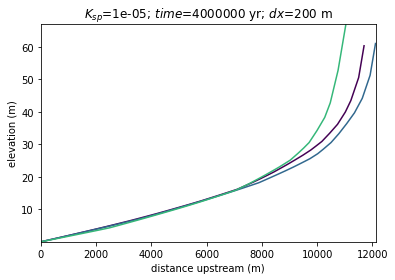

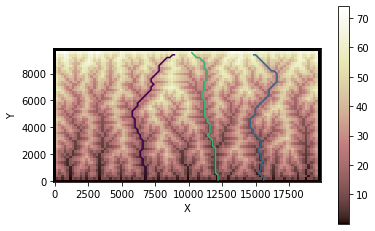

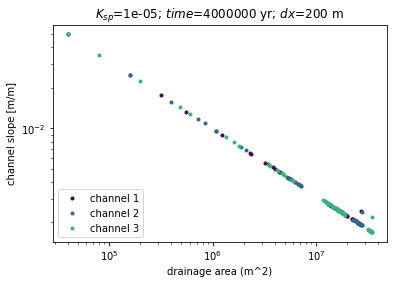

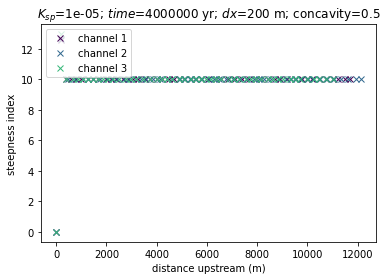

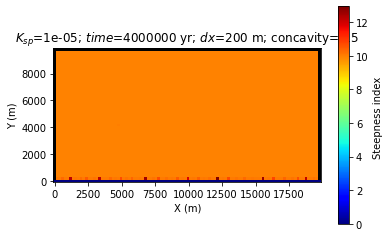

In [3]:
# code block for question 1

# RunWrapper(option='test0')
# RunWrapper(option='plot')
z1 = RunWrapper(option='plot', is_run_to_converge=True, tolerance=1e-6)

In [4]:
def RunWrapper1(z1, **kwargs):
    # Code Block 14
    number_of_rows = 50  # number of raster cells in vertical direction (y)
    number_of_columns = 100  # number of raster cells in horizontal direction (x)
    dxy2 = 200  # side length of a raster model cell, or resolution [m]

    # Below is a raster (square cells) grid, with equal width and height
    mg2 = RasterModelGrid((number_of_rows, number_of_columns), dxy2)

    # Set boundary conditions - only the south side of the grid is open.
    # Boolean parameters are sent to function in order of
    # east, north, west, south.
    mg2.set_closed_boundaries_at_grid_edges(True, True, True, False)

    z2 = copy.copy(z1)  # initialize the elevations with the steady state
    # topography produced for question 1
    z2 = mg2.add_field("topographic__elevation", z2, at="node")

    # K_sp value for base landscape is 1e-5
    K_sp2 = 1e-5  # units vary depending on m_sp and n_sp
    m_sp2 = 0.5  # exponent on drainage area in stream power equation
    n_sp2 = 1.0  # exponent on slope in stream power equation

    frr2 = FlowAccumulator(mg2)  # intializing flow routing
    spr2 = StreamPowerEroder(
        mg2, K_sp=K_sp2, m_sp=m_sp2, n_sp=n_sp2,
        threshold_sp=0.0)  # initializing stream power incision

    theta2 = m_sp2 / n_sp2
    # initialize the component that will calculate channel steepness
    sf2 = SteepnessFinder(mg2,
                          reference_concavity=theta2,
                          min_drainage_area=1000.0)
    # initialize the component that will calculate the chi index
    cf2 = ChiFinder(mg2,
                    min_drainage_area=1000.0,
                    reference_concavity=theta2,
                    use_true_dx=True)
    # Code Block 15

    nstep = 200  # time for the model to run [yr] (Original value was 5E5 yr)
    dt = 500  # time step [yr] (Original value was 500 yr)
    total_time = kwargs.get('start_time', 0)  # amount of time the landscape has evolved [yr]
    # total_time will increase as you keep running the code.
    
    # Code Block 16

    #  uplift_rate [m/yr] (value was 0.0001 m/yr for base landscape)
    uplift_rate_value = kwargs.get('uplift_rate_value', 1e-4)
    uplift_rate = np.ones(mg2.number_of_nodes) * uplift_rate_value
    
    is_run_to_converge = kwargs.get("is_run_to_converge", False)
    if is_run_to_converge:
        # Code Block 17
        max_elev_this = np.max(z2)
        # tolerance for relative error
        tolerance = kwargs.get('tolerance', 1e-2)
        while True:
            for step in range(nstep):
                z2[mg2.
                   core_nodes] += uplift_rate[mg2.core_nodes] * dt  # uplift the landscape
                frr2.run_one_step()  # route flow
                spr2.run_one_step(dt)  # fluvial incision
                total_time += dt  # update time keeper
                sys.stdout.write("\r{0}".format(total_time))
                sys.stdout.flush()
            # condition to converge
            max_elev_prev = max_elev_this
            max_elev_this = np.max(z2)
            max_elev_diff = abs(max_elev_this - max_elev_prev) / abs(max_elev_this)
            sys.stdout.write(" max_elev_diff=%.4e\n" % (max_elev_diff))
            sys.stdout.flush()
            is_converge = (max_elev_diff) < tolerance
            if is_converge:
                break 
    else:
        for step in range(nstep):
            z2[mg2.
                core_nodes] += uplift_rate[mg2.core_nodes] * dt  # uplift the landscape
            frr2.run_one_step()  # route flow
            spr2.run_one_step(dt)  # fluvial incision
            total_time += dt  # update time keeper
            sys.stdout.write("\r{0}".format(total_time))
            sys.stdout.flush()

    
    sys.stdout.write("\n")
    sys.stdout.flush()
    
    # Code Block 18
    # Plot topography

    plt.figure()
    imshow_grid(mg2,
                "topographic__elevation",
                grid_units=("m", "m"),
                var_name="Elevation (m)")
    plt.title(f"$K_{{sp}}$={K_sp2}; $time$={total_time} yr; $dx$={dxy2} m")

    max_elev = np.max(z2)
    print("Maximum elevation is ", np.max(z2))
    subdir = os.path.join('stream_power_channels_results', 'transient_Ksp%.4e_uplift%.4e' % (K_sp2, uplift_rate_value))
    if not os.path.isdir(subdir):
        os.mkdir(subdir)
    filename = os.path.join(subdir, "transient_total_time%.4e_1_topography.png" % (total_time))
    plt.savefig(filename)
    
    # Code Block 19
    # Plot Channel Profiles and slope-area data along the channels

    prf2 = ChannelProfiler(mg2,
                           number_of_watersheds=3,
                           main_channel_only=True,
                           minimum_channel_threshold=dxy2**2)
    prf2.run_one_step()

    # plot the elevation as a function of distance upstream
    plt.figure()
    title_text = f"$K_{{sp}}$={K_sp2}; $time$={total_time} yr; $dx$={dxy2} m"
    prf2.plot_profiles(xlabel='distance upstream (m)',
                      ylabel='elevation (m)',
                      title=title_text)
    
    filename = os.path.join(subdir, "transient_total_time%.4e_2_elevation_distance.png" % (total_time))
    plt.savefig(filename)

    # plot the location of the channels in map view
    plt.figure()
    prf2.plot_profiles_in_map_view()
    filename = os.path.join(subdir, "transient_total_time%.4e_3_profile_map.png" % (total_time))
    plt.savefig(filename)

    # slope-area data in just the profiled channels
    plt.figure()
    for i, outlet_id in enumerate(prf2.data_structure):
        for j, segment_id in enumerate(prf2.data_structure[outlet_id]):
            if j == 0:
                label = "channel {i}".format(i=i + 1)
            else:
                label = '_nolegend_'
            segment = prf2.data_structure[outlet_id][segment_id]
            profile_ids = segment["ids"]
            color = segment["color"]
            plt.loglog(
                mg2.at_node["drainage_area"][profile_ids],
                mg2.at_node["topographic__steepest_slope"][profile_ids],
                '.',
                color=color,
                label=label,
            )

    plt.legend(loc="lower left")
    plt.xlabel("drainage area (m^2)")
    plt.ylabel("channel slope [m/m]")
    title_text = f"$K_{{sp}}$={K_sp2}; $time$={total_time} yr; $dx$={dxy2} m"
    plt.title(title_text)
    filename = os.path.join(subdir, "transient_total_time%.4e_4_area_slope.png" % (total_time))
    plt.savefig(filename)
    
    # Code Block 20
    # Chi Plots

    # calculate the chi index
    cf2.calculate_chi()

    # chi-elevation plots in the profiled channels
    plt.figure()
    for i, outlet_id in enumerate(prf2.data_structure):
        for j, segment_id in enumerate(prf2.data_structure[outlet_id]):
            if j == 0:
                label = "channel {i}".format(i=i + 1)
            else:
                label = '_nolegend_'
            segment = prf2.data_structure[outlet_id][segment_id]
            profile_ids = segment["ids"]
            color = segment["color"]
            plt.plot(
                mg2.at_node["channel__chi_index"][profile_ids],
                mg2.at_node["topographic__elevation"][profile_ids],
                color=color,
                label=label,
            )

    plt.xlabel("chi index (m)")
    plt.ylabel("elevation (m)")
    plt.legend(loc="lower right")
    title_text = f"$K_{{sp}}$={K_sp2}; $time$={total_time} yr; $dx$={dxy2} m; concavity={theta2}"
    plt.title(title_text)
    filename = os.path.join(subdir, "transient_total_time%.4e_5_chi_elevation.png" % (total_time))
    plt.savefig(filename)
    
    # chi map
    plt.figure()
    imshow_grid(
        mg2,
        "channel__chi_index",
        grid_units=("m", "m"),
        var_name="Chi index (m)",
        cmap="jet",
    )
    plt.title(
        f"$K_{{sp}}$={K_sp2}; $time$={total_time} yr; $dx$={dxy2} m; concavity={theta2}"
    )
    filename = os.path.join(subdir, "transient_total_time%.4e_6_chi_map.png" % (total_time))
    plt.savefig(filename)
    
    # Code Block 21
    # Plot channel steepness along profiles and across the landscape

    # calculate channel steepness
    sf2.calculate_steepnesses()

    # plots of steepnes vs. distance upstream in the profiled channels
    plt.figure()

    for i, outlet_id in enumerate(prf2.data_structure):
        for j, segment_id in enumerate(prf2.data_structure[outlet_id]):
            if j == 0:
                label = "channel {i}".format(i=i + 1)
            else:
                label = '_nolegend_'
            segment = prf2.data_structure[outlet_id][segment_id]
            profile_ids = segment["ids"]
            distance_upstream = segment["distances"]
            color = segment["color"]
            plt.plot(
                distance_upstream,
                mg2.at_node["channel__steepness_index"][profile_ids],
                'x',
                color=color,
                label=label,
            )

    plt.xlabel("distance upstream (m)")
    plt.ylabel("steepness index")
    plt.legend(loc="upper left")
    plt.title(
        f"$K_{{sp}}$={K_sp2}; $time$={total_time} yr; $dx$={dxy2} m; concavity={theta2}"
    )
    filename = os.path.join(subdir, "transient_total_time%.4e_7_distance_steepness.png" % (total_time))
    plt.savefig(filename)

    # channel steepness map
    plt.figure()
    imshow_grid(
        mg2,
        "channel__steepness_index",
        grid_units=("m", "m"),
        var_name="Steepness index ",
        cmap="jet",
    )
    plt.title(
        f"$K_{{sp}}$={K_sp2}; $time$={total_time} yr; $dx$={dxy2} m; concavity={theta2}"
    )
    
    filename = os.path.join(subdir, "transient_total_time%.4e_8_channel_steepness.png" % (total_time))
    plt.savefig(filename)
    
    return z2, total_time

100000
Maximum elevation is  106.450348842


/home/jovyan/.conda/envs/gel214_test/lib/python3.8/site-packages/landlab/plot/imshow.py:267: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("pink"))
  cmap.set_bad(color=color_for_closed)
/home/jovyan/.conda/envs/gel214_test/lib/python3.8/site-packages/landlab/plot/imshow.py:267: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet"))
  cmap.set_bad(color=color_for_closed)
/home/jovyan/.conda/envs/gel214_test/lib/python3.8/site-packages/landlab/plot/imshow.py:307: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effe

200000
Maximum elevation is  137.496066323


/home/jovyan/.conda/envs/gel214_test/lib/python3.8/site-packages/landlab/plot/imshow.py:267: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("pink"))
  cmap.set_bad(color=color_for_closed)
/home/jovyan/.conda/envs/gel214_test/lib/python3.8/site-packages/landlab/plot/imshow.py:267: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet"))
  cmap.set_bad(color=color_for_closed)
/home/jovyan/.conda/envs/gel214_test/lib/python3.8/site-packages/landlab/plot/imshow.py:307: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effe

300000
Maximum elevation is  168.215892983


/home/jovyan/.conda/envs/gel214_test/lib/python3.8/site-packages/landlab/plot/imshow.py:267: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("pink"))
  cmap.set_bad(color=color_for_closed)
<ipython-input-4-efcae95a0225>:167: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/home/jovyan/.conda/envs/gel214_test/lib/python3.8/site-packages/landlab/plot/imshow.py:267: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-p

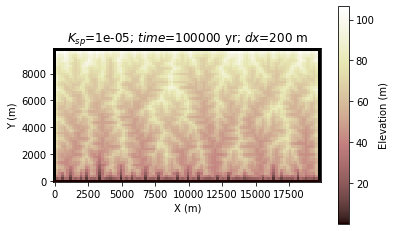

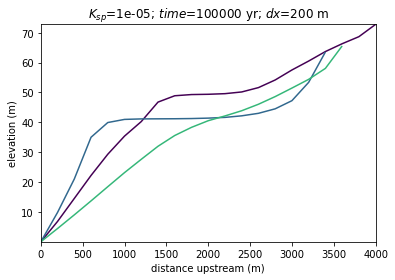

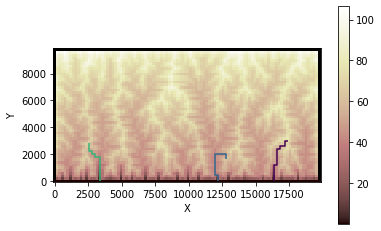

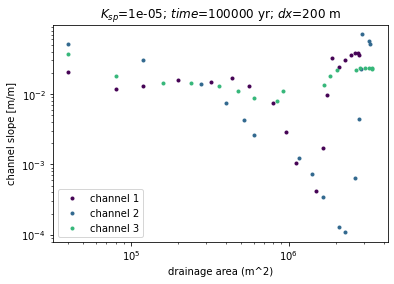

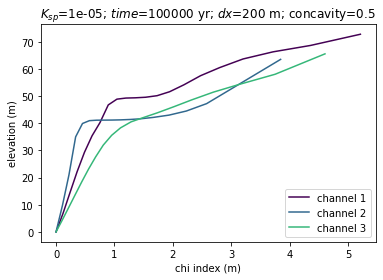

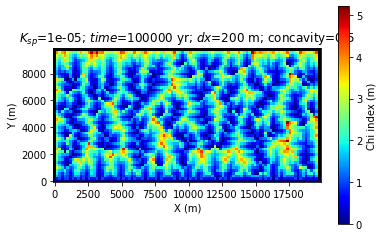

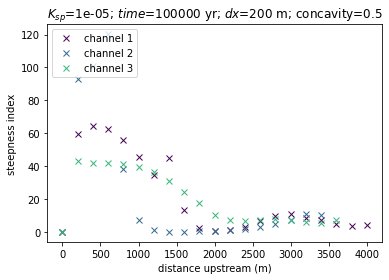

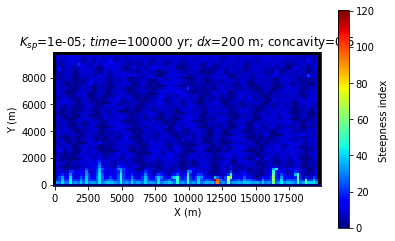

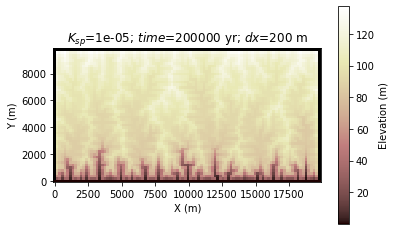

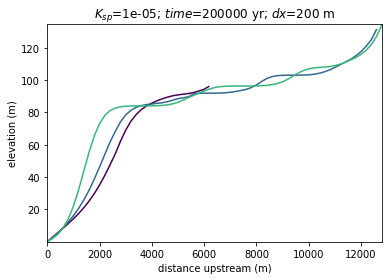

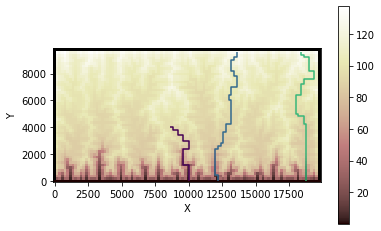

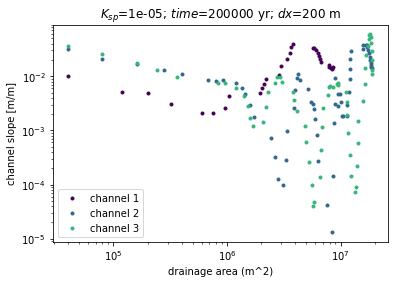

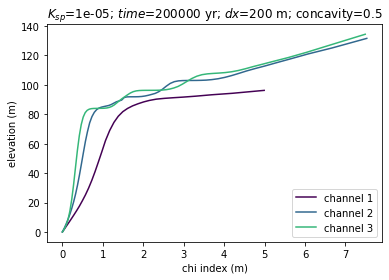

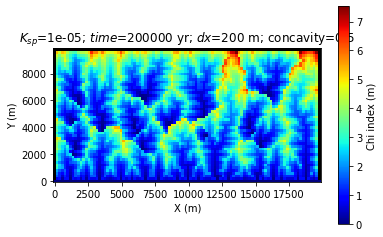

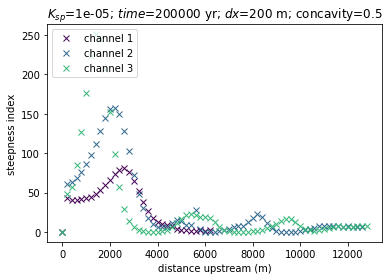

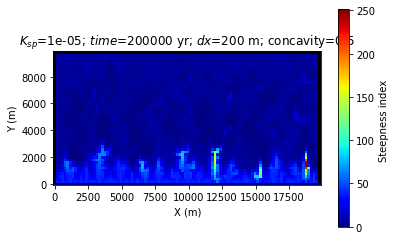

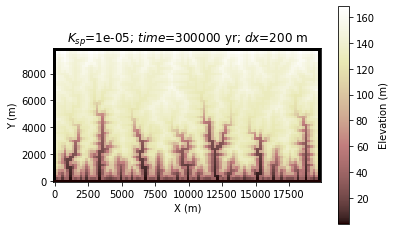

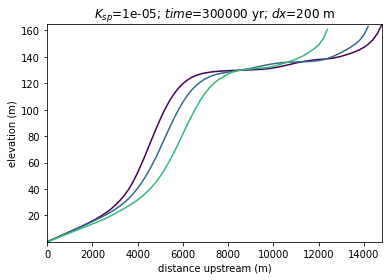

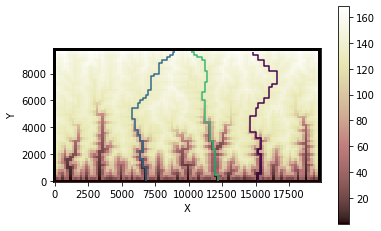

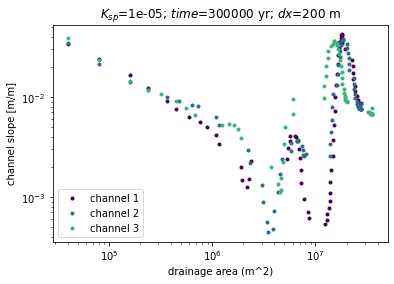

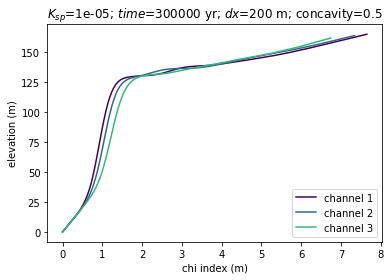

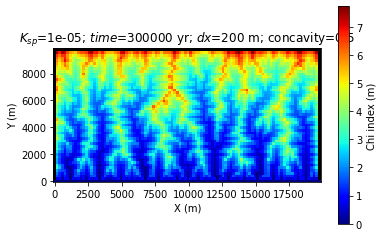

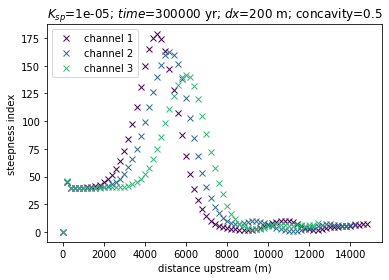

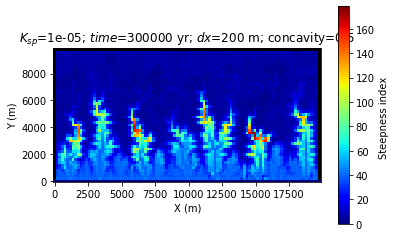

In [5]:
# code block for question 2

z2, end_time = RunWrapper1(z1, uplift_rate_value=4e-4)
max_elev = np.max(z2)
max_elev_end = 140
while max_elev < max_elev_end :
    z2, end_time = RunWrapper1(z2, uplift_rate_value=4e-4, start_time=end_time)
    max_elev = np.max(z2) # max topography

100000 max_elev_diff=3.0567e-01
200000 max_elev_diff=2.2579e-01
300000 max_elev_diff=1.8262e-01
400000 max_elev_diff=1.6632e-01
500000 max_elev_diff=1.4264e-01
600000 max_elev_diff=1.2455e-01
700000 max_elev_diff=1.1062e-01
800000 max_elev_diff=8.1364e-02
900000 max_elev_diff=4.1370e-02
1000000 max_elev_diff=7.0819e-04
1100000 max_elev_diff=1.7204e-02
1200000 max_elev_diff=1.5287e-02
1300000 max_elev_diff=9.0216e-03
1400000 max_elev_diff=4.4728e-03
1500000 max_elev_diff=2.0945e-03
1600000 max_elev_diff=9.5563e-04
1700000 max_elev_diff=5.4077e-06

Maximum elevation is  326.68083046


/home/jovyan/.conda/envs/gel214_test/lib/python3.8/site-packages/landlab/plot/imshow.py:267: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("pink"))
  cmap.set_bad(color=color_for_closed)
/home/jovyan/.conda/envs/gel214_test/lib/python3.8/site-packages/landlab/plot/imshow.py:267: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet"))
  cmap.set_bad(color=color_for_closed)
/home/jovyan/.conda/envs/gel214_test/lib/python3.8/site-packages/landlab/plot/imshow.py:307: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effe

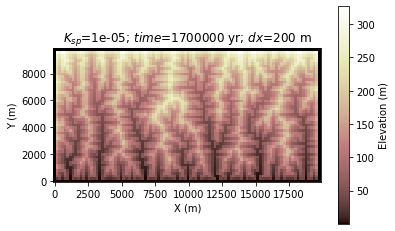

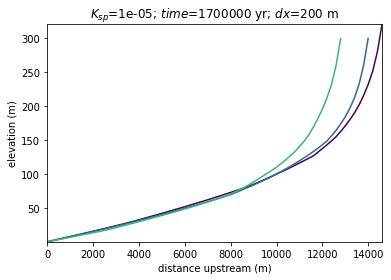

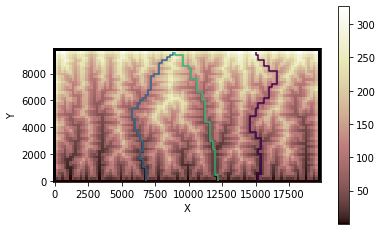

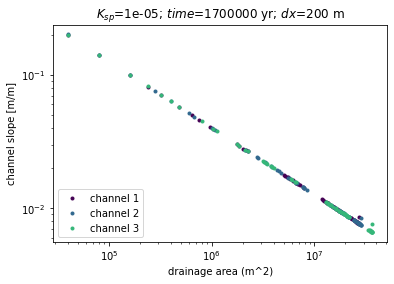

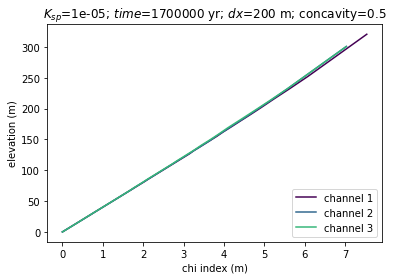

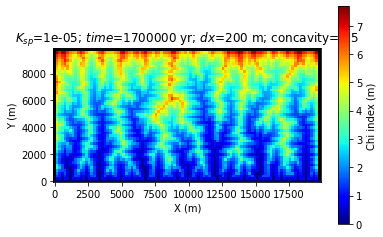

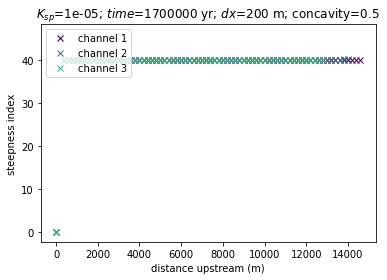

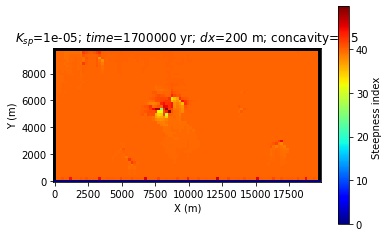

In [6]:
# code block for question 3
z2, end_time = RunWrapper1(z1, uplift_rate_value=4e-4, is_run_to_converge=True, tolerance=1e-5)